In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer 


In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [31]:
data = pd.read_csv("C:\\Users\\royka\\Downloads\\flipkart_data - flipkart_data.csv")
print(data.head())

                                              review  Unnamed: 1  rating
0  It was nice produt. I like it's design a lot. ...         NaN       5
1  awesome sound....very pretty to see this nd th...         NaN       5
2  awesome sound quality. pros 7-8 hrs of battery...         NaN       4
3  I think it is such a good product not only as ...         NaN       5
4  awesome bass sound quality very good bettary l...         NaN       5


In [32]:
data

,review,Unnamed: 1,rating
0,It was nice produt. I like it's design a lot. ...,NaN,5
1,awesome sound....very pretty to see this nd th...,NaN,5
2,awesome sound quality. pros 7-8 hrs of battery...,NaN,4
3,I think it is such a good product not only as ...,NaN,5
4,awesome bass sound quality very good bettary l...,NaN,5
...,...,...,...
9971,GoodREAD MORE,NaN,5
9972,Everything is amazimg but the built is very li...,NaN,5
9973,GoodREAD MORE,NaN,5
9974,Best headphone i have ever used....READ MORE,NaN,5


In [33]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\royka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\royka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# unique ratings 
pd.unique(data['rating'])


array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

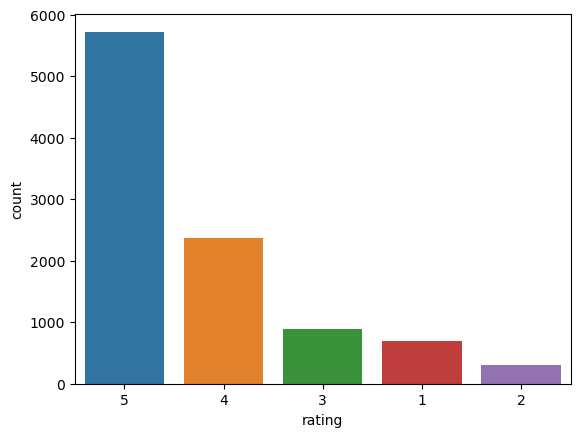

In [36]:
sns.countplot(data=data, 
            x='rating', 
            order=data.rating.value_counts().index)


In [37]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

In [38]:
# rating label(final) 
pos_neg = [] 
for i in range(len(data['rating'])): 
	if data['rating'][i] >= 5: 
		pos_neg.append(1) 
	else: 
		pos_neg.append(0) 

data['label'] = pos_neg 


In [39]:
from tqdm import tqdm 


def preprocess_text(text_data): 
	preprocessed_text = [] 

	for sentence in tqdm(text_data): 
		# Removing punctuations 
		sentence = re.sub(r'[^\w\s]', '', sentence) 

		# Converting lowercase and removing stopwords 
		preprocessed_text.append(' '.join(token.lower() 
										for token in nltk.word_tokenize(sentence) 
										if token.lower() not in stopwords.words('english'))) 

	return preprocessed_text 


In [40]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review



  0%|                                                                                         | 0/9976 [00:00<?, ?it/s]


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\royka/nltk_data'
    - 'C:\\Users\\royka\\anaconda3\\nltk_data'
    - 'C:\\Users\\royka\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\royka\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\royka\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [41]:
data.head()


,review,Unnamed: 1,rating,label
0,It was nice produt. I like it's design a lot. ...,NaN,5,1
1,awesome sound....very pretty to see this nd th...,NaN,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,NaN,4,0
3,I think it is such a good product not only as ...,NaN,5,1
4,awesome bass sound quality very good bettary l...,NaN,5,1


In [42]:
data["label"].value_counts()


1    5726
0    4250
Name: label, dtype: int64

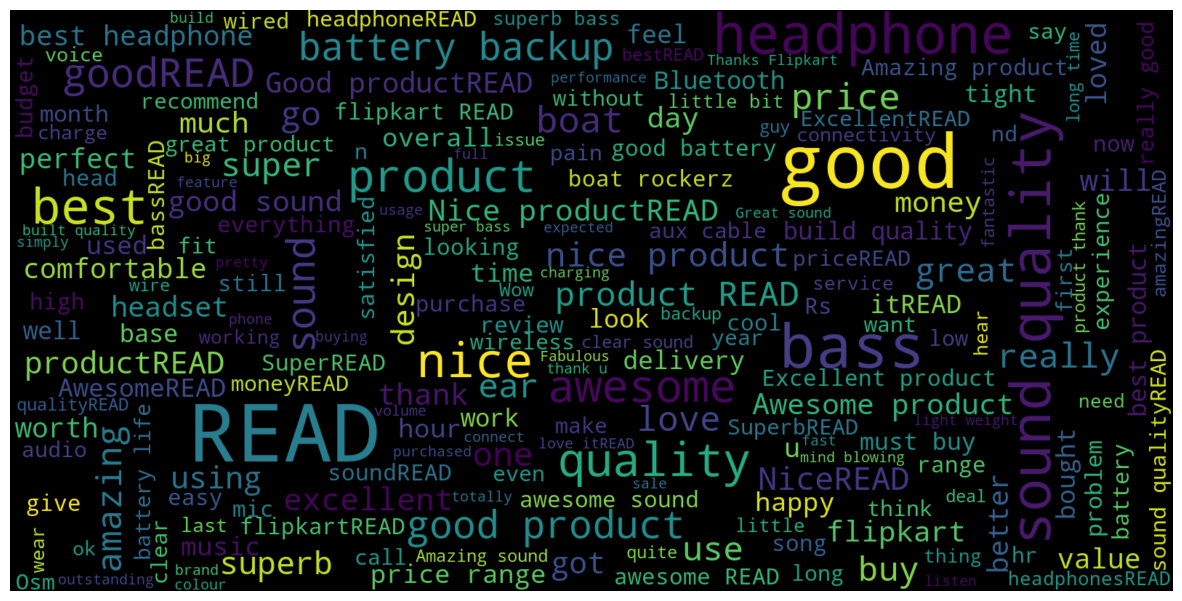

In [43]:
consolidated = ' '.join( 
	word for word in data['review'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
					random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


In [44]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()


In [45]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
													test_size=0.33, 
													stratify=data['label'], 
													random_state = 42)


In [48]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 




DecisionTreeClassifier(random_state=0)

In [49]:
#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

NameError: name 'accuracy_score' is not defined

In [50]:
from sklearn import metrics 
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True]) 

cm_display.plot() 
plt.show()


NameError: name 'confusion_matrix' is not defined

In [53]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\royka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive  Negative  \
0  It was nice produt. I like it's design a lot. ...     0.387       0.0   
1  awesome sound....very pretty to see this nd th...     0.483       0.0   
2  awesome sound quality. pros 7-8 hrs of battery...     0.177       0.0   
3  I think it is such a good product not only as ...     0.328       0.0   
4  awesome bass sound quality very good bettary l...     0.405       0.0   

   Neutral  
0    0.613  
1    0.517  
2    0.823  
3    0.672  
4    0.595  


In [54]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral 🙂 


In [55]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  2569.9410000000457
Negative:  363.4859999999994
Neutral:  7042.627000000062


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


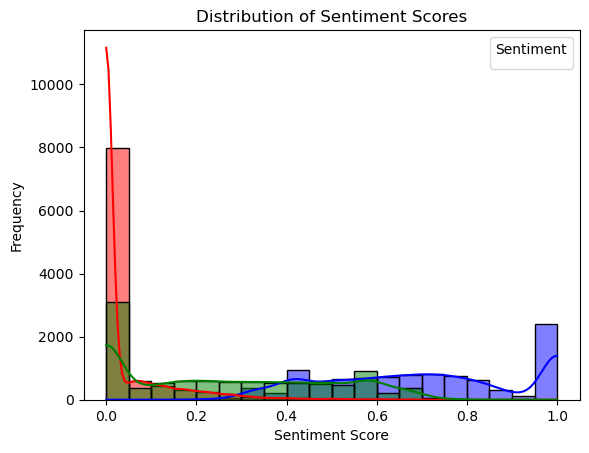

In [56]:
import seaborn as sns

# Create a histogram with density plot
sns.histplot(data, bins=20, kde=True, hue_order=['Positive', 'Negative', 'Neutral'], palette=['green', 'red', 'blue'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.legend(title='Sentiment')
plt.show()

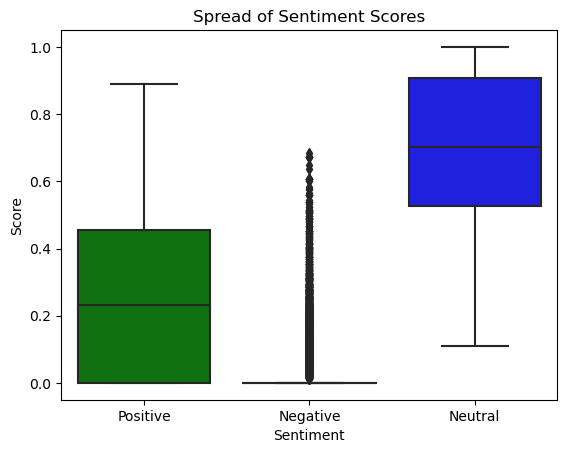

In [57]:
sns.boxplot(data=data, palette=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Spread of Sentiment Scores')
plt.show()

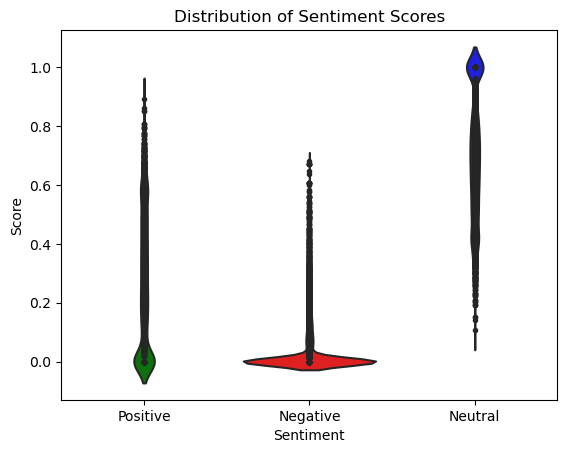

In [58]:
# Create a violin plot
sns.violinplot(data=data, inner='point', palette=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Distribution of Sentiment Scores')
plt.show()

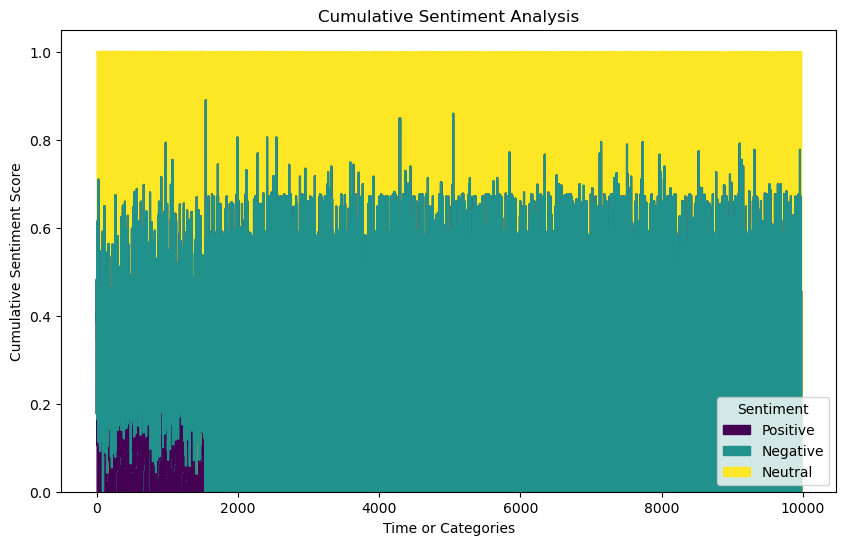

In [59]:
# Assuming 'data' contains sentiment scores over time or categories
data.plot.area(stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel('Time or Categories')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Analysis')
plt.legend(title='Sentiment')
plt.show()

In [60]:
from sklearn import metrics 
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
											display_labels = [False, True]) 

cm_display.plot() 
plt.show()


NameError: name 'confusion_matrix' is not defined